# Develop the Pre-defined Gestures

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

import math

In [101]:
SKELETON = ((0, 1, 2, 3, 4), (0, 5, 6, 7, 8), (0, 9, 10, 11, 12), (0, 13, 14, 15, 16), (0, 17, 18, 19, 20))
LANDMARKS_STRAIGHT = np.array([[119.82615 , 212.28177 ], [ 92.84324 , 192.66972 ], [ 78.626495, 171.23352 ], [ 70.108185, 147.73805 ], [ 57.609592, 129.26169 ], [112.15622 , 146.60745 ], [109.63194 , 114.18461 ], [106.99416 ,  94.04117 ], [105.75218 ,  77.257706], [131.35513 , 145.02748 ], [133.53264 , 111.75909 ], [134.25839 ,  87.057686], [134.99535 ,  68.95971 ], [147.58751 , 151.0447  ], [151.55582 , 120.84677 ], [152.1747  , 101.54744 ], [152.46858 ,  85.641335], [162.22935 , 164.26425 ], [171.53485 , 146.46252 ], [178.10994 , 132.35309 ],[184.24037 , 116.23295 ]], dtype=np.float32)
LANDMARKS_BENT = np.array([[169.54655 , 228.73044 ], [133.71887 , 212.96152 ], [113.0791  , 197.19962 ], [115.46895 , 182.82887 ], [118.57342 , 177.05916 ], [140.85466 , 157.7581  ], [158.4088  , 126.67055 ], [162.54175 , 123.795105], [164.60458 , 123.20148 ], [166.28374 , 155.58205 ], [178.00342 , 122.80996 ], [178.12108 , 130.5404  ], [172.23    , 140.907   ], [186.53766 , 163.83943 ], [198.22438 , 137.29433 ], [192.68393 , 152.80006 ], [184.18576 , 167.49413 ], [202.40858 , 175.64977 ], [213.182   , 159.77519 ], [205.67984 , 165.92831 ], [194.45265 , 172.11864 ]], dtype=np.float32)
COLORS = ['r', 
          'red', 'red', 'red', 'red', 
          'royalblue', 'royalblue', 'royalblue', 'royalblue',
          'gold', 'gold', 'gold', 'gold', 
          'limegreen', 'limegreen', 'limegreen', 'limegreen', 
          'deeppink', 'deeppink', 'deeppink', 'deeppink', 
         ]

In [102]:
def calculate_angle(landmarks):
    angle_list = []
    for finger in SKELETON:
        landmarks_finger = landmarks[finger, :]
        finger_angle_list = []
        for i in range(1, 4):
            ori = landmarks_finger[i]
            p1 = landmarks_finger[i-1]
            p2 = landmarks_finger[i+1]
            v1 = -(ori - p1)
            v2 = p2 - ori
            unit_v1 = v1 / np.linalg.norm(v1)
            unit_v2 = v2 / np.linalg.norm(v2)
            dot_product = np.dot(unit_v1, unit_v2)
            angle = math.degrees(np.arccos(dot_product))
            finger_angle_list.append(angle)
        angle_list.append(finger_angle_list)
    return angle_list

In [103]:
def plot_joint_name(lanmarks):
    xs, ys = [p[0] for p in lanmarks], [p[1] for p in lanmarks]
    for i in range(len(xs)):
        plt.text(xs[i]-9, ys[i]-8, JOINT_NAME[i], fontsize=12)
    return None

In [104]:
def plot_skeloton(lanmarks, finger_lengend_text):
    xs, ys = [p[0] for p in lanmarks], [p[1] for p in lanmarks]
    for i in range(1, 18, 4):
        temp_x = [xs[0]] + [xs[i+j] for j in range(4)]
        temp_y = [ys[0]] + [ys[i+j] for j in range(4)]
        plt.plot(temp_x, temp_y, c=COLORS[i], linewidth=2, alpha=0.8, label=finger_lengend_text[i//4])
        plt.plot(temp_x, temp_y, c=COLORS[i], linewidth=5, alpha=0.2)
    plt.scatter(lanmarks[:,0], lanmarks[:,1], c='steelblue', zorder=10)
    plt.legend()
    plt.grid()
    return None

In [124]:
def plot_angle(lanmarks, angle_list):
    for i in range(5):
        landmarks_finger = lanmarks[SKELETON[i], :]
        for j in range(1, 4):
            ori = landmarks_finger[j]
            plt.text(ori[0], ori[1], str(round(angle_list[i][j-1], 2))+'°', fontsize=12)
    return None

## The names of joints 

Wrist, TMCP, IMCP, MMCP, RMCP, PMCP, TPIP, TDIP, TTIP, IPIP, IDIP, ITIP, MPIP, MDIP, MTIP, RPIP, RDIP, RTIP, PPIP, PDIP, PTIP

"T", "I", "M", "R", "P" denote "Thumb", "Index", "Middle", "Ring", "Pinky" fingers.

In [125]:
FINGER_NAME = ["Thumb", "Index", "Middle", "Ring", "Pinky"]
JOINT_NAME = ['Wrist', 'TMCP', 'TPIP', 'TDIP', 'TTIP', 'IMCP', 'IPIP', 'IDIP', 'ITIP', 'MMCP', 'MPIP', 'MDIP', 'MTIP', 'RMCP', 'RPIP', 'RDIP', 'RTIP', 'PMCP', 'PPIP', 'PDIP', 'PTIP']

In [126]:
LANDMARKS = LANDMARKS_STRAIGHT

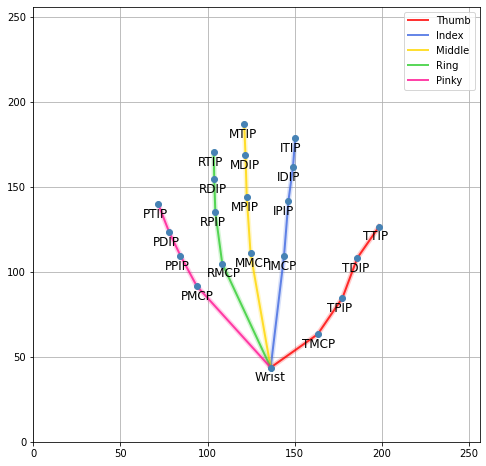

In [127]:
plt.figure(figsize=(8, 8))
plt.axis([0, 256, 0, 256])
plot_skeloton(256 - LANDMARKS, FINGER_NAME)
plot_joint_name(256 - LANDMARKS)
plt.show()

## Draw Original Skeloton

In [128]:
LANDMARKS = LANDMARKS_STRAIGHT

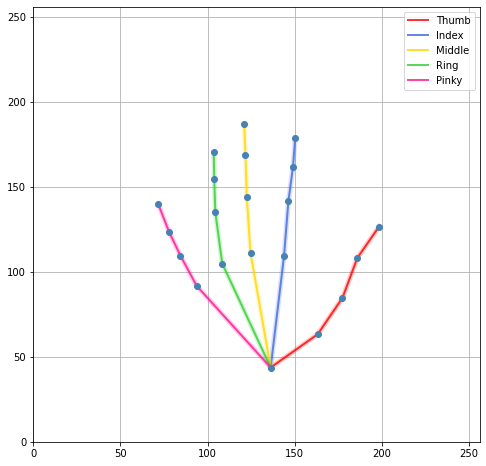

In [129]:
plt.figure(figsize=(8, 8))
plt.axis([0, 256, 0, 256])
plot_skeloton(256 - LANDMARKS, FINGER_NAME)
plt.show()

## Angles of Landmarks

For calculating angles between two vectors, use $a \cdot b = \vert a \vert \vert b \vert \cos{\theta}$

We calculate angles at MCP, PIP, DIP for each finger, and for each angle we obtain vectors by its two adjacent joints.

e.g. form two vectors and calculate angle by Wrist, MCP, PIP for MCP 

In [130]:
LANDMARKS = LANDMARKS_STRAIGHT

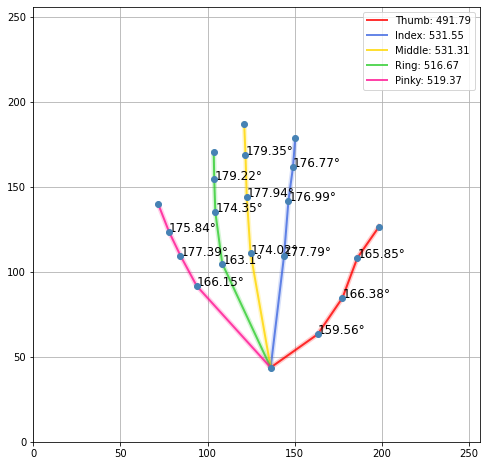

In [131]:
plt.figure(figsize=(8, 8))
plt.axis([0, 256, 0, 256])
angle_list = calculate_angle(LANDMARKS)
angle_sum_list = [round(sum(finger_angles), 2) for finger_angles in angle_list]
legend_text = ["%s: %s" % (FINGER_NAME[i], angle_sum_list[i]) for i in range(5)]
plot_skeloton(256 - LANDMARKS, legend_text)
plot_angle(256 - LANDMARKS, angle_list)
plt.show()

In [132]:
LANDMARKS = LANDMARKS_BENT

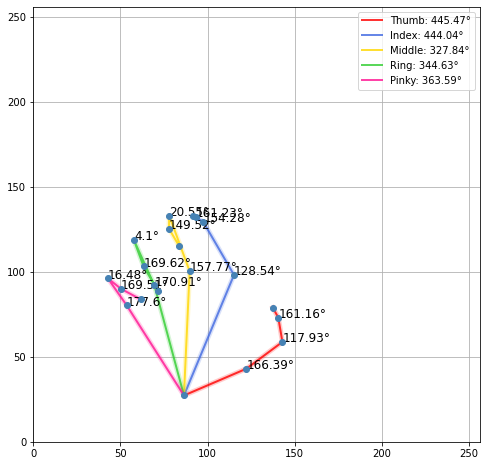

In [133]:
plt.figure(figsize=(8, 8))
plt.axis([0, 256, 0, 256])
angle_list = calculate_angle(LANDMARKS)
angle_sum_list = [round(sum(finger_angles), 2) for finger_angles in angle_list]
legend_text = ["%s: %s°" % (FINGER_NAME[i], angle_sum_list[i]) for i in range(5)]
plot_skeloton(256 - LANDMARKS, legend_text)
plot_angle(256 - LANDMARKS, angle_list)
plt.show()

## Landmarks Alignment

In [134]:
LANDMARKS = LANDMARKS_STRAIGHT

In [135]:
temp = 256 - LANDMARKS
temp[:,0] = temp[:,0] - (temp[0][0])
temp[:,1] = temp[:,1] - (temp[0][1])

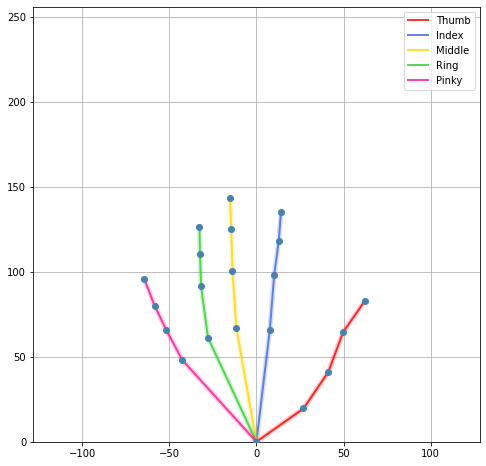

In [136]:
plt.figure(figsize=(8, 8))
plt.axis([-128, 128, 0, 256])
plot_skeloton(temp, FINGER_NAME)
plt.show()

## Normailze Landmarks

In [143]:
LANDMARKS = LANDMARKS_STRAIGHT
LANDMARKS = 256 - LANDMARKS
LANDMARKS[:,0] = LANDMARKS[:,0] - (LANDMARKS[0][0])
LANDMARKS[:,1] = LANDMARKS[:,1] - (LANDMARKS[0][1])

In [144]:
landmarks_unit = [[0,0]]
for finger in SKELETON:
    finger_landmarks_unit = [[0.,0.]]
    finger_landmarks = LANDMARKS[finger, :]
    for i in range(1, 5):
        vector = finger_landmarks[i] - finger_landmarks[i-1]
        unit_vector = vector / np.linalg.norm(vector)
        finger_landmarks_unit.append(unit_vector)
    for i in range(1, 5):
        finger_landmarks_unit[i] += finger_landmarks_unit[i-1]
    landmarks_unit.extend(finger_landmarks_unit[1:])
landmarks_unit = np.array(landmarks_unit).reshape(-1, 2)

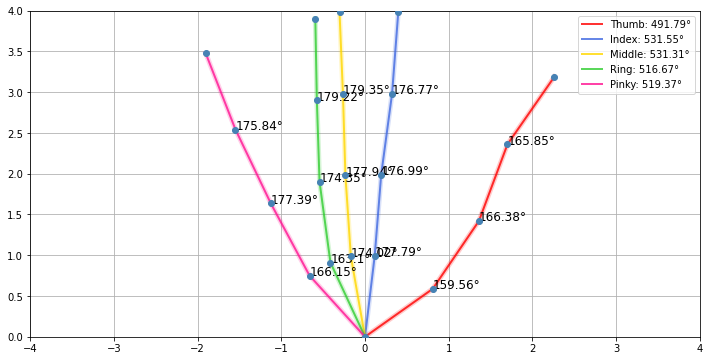

In [145]:
plt.figure(figsize=(12, 6))
plt.axis([-4, 4, 0, 4])
angle_list = calculate_angle(landmarks_unit)
angle_sum_list = [round(sum(finger_angles), 2) for finger_angles in angle_list]
legend_text = ["%s: %s°" % (FINGER_NAME[i], angle_sum_list[i]) for i in range(5)]
plot_skeloton(landmarks_unit, legend_text)
plot_angle(landmarks_unit, angle_list)
plt.show()

In [146]:
LANDMARKS = LANDMARKS_BENT
LANDMARKS = 256 - LANDMARKS
LANDMARKS[:,0] = LANDMARKS[:,0] - (LANDMARKS[0][0])
LANDMARKS[:,1] = LANDMARKS[:,1] - (LANDMARKS[0][1])

In [147]:
landmarks_unit = [[0,0]]
for finger in SKELETON:
    finger_landmarks_unit = [[0.,0.]]
    finger_landmarks = LANDMARKS[finger, :]
    for i in range(1, 5):
        vector = finger_landmarks[i] - finger_landmarks[i-1]
        unit_vector = vector / np.linalg.norm(vector)
        finger_landmarks_unit.append(unit_vector)
    for i in range(1, 5):
        finger_landmarks_unit[i] += finger_landmarks_unit[i-1]
    landmarks_unit.extend(finger_landmarks_unit[1:])
landmarks_unit = np.array(landmarks_unit).reshape(-1, 2)

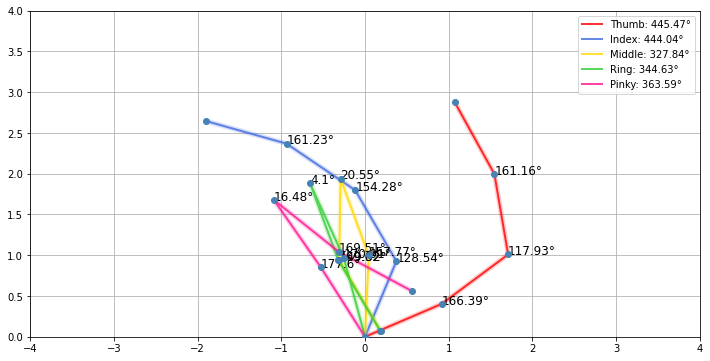

In [148]:
plt.figure(figsize=(12, 6))
plt.axis([-4, 4, 0, 4])
angle_list = calculate_angle(landmarks_unit)
angle_sum_list = [round(sum(finger_angles), 2) for finger_angles in angle_list]
legend_text = ["%s: %s°" % (FINGER_NAME[i], angle_sum_list[i]) for i in range(5)]
plot_skeloton(landmarks_unit, legend_text)
plot_angle(landmarks_unit, angle_list)
plt.show()